In [1]:
import torch
import cv2 as cv
import numpy as np
from pathlib import Path
import os
import multiprocessing as mp
from shutil import move as mv_file
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [4]:
torch.has_cuda

True

# Zadanie 1

In [1]:
def read_image(path: str):
    return cv.imread(path)    

def sort_images():
    processes = []
    cwd = Path.cwd().joinpath('Real')
    dest = Path.cwd().joinpath('data')

    for file in Path.iterdir(cwd):
        print(file)
        subject_number = file.name.split('_')[0]
        subject_folder = dest.joinpath(subject_number)
        if not subject_folder.exists():
            subject_folder.mkdir()
        if subject_folder.exists():
            processes.append(mp.Process(target=mv_file, args=(file, dest.joinpath(subject_number).joinpath(file.name))))

    for process in processes:
        process.start() 

    for process in processes:
        process.join() 


In [ ]:
sort_images()

c:\dev\biometry-masters-class\ps4\data\1\1__M_Left_index_finger.BMP c:\dev\biometry-masters-class\ps4\data\1\1__M_Left_little_finger.BMP


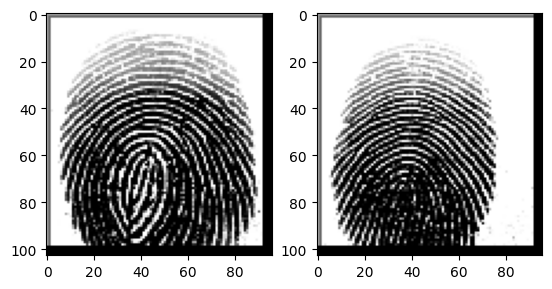

In [2]:
subject_folder_iter = Path.cwd().joinpath('data').joinpath('1').iterdir() 
file_1 = next(subject_folder_iter)
file_2 = next(subject_folder_iter)
print(file_1, file_2)
file_mat_1 = cv.imread(str(file_1))
file_mat_2 = cv.imread(str(file_2))
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.imshow(file_mat_1)
ax2.imshow(file_mat_2)

In [3]:
best_score = counter = 0
sift = cv.SIFT_create()
keypoints_1, des1 = sift.detectAndCompute(file_mat_1, None)
keypoints_2, des2 = sift.detectAndCompute(file_mat_2, None)

matches = cv.FlannBasedMatcher({'algorithm': 1, 'trees': 10}, {}).knnMatch(
    des1, des2, k=2
)

match_points = []
for p, q in matches:
    if p.distance < 0.1 *q.distance:
        match_points.append(p)
print([(p.pt, p.angle) for p in keypoints_1])

[((4.119409084320068, 50.963294982910156), 359.8327941894531), ((5.246762275695801, 43.77163314819336), 198.70408630371094), ((5.3329057693481445, 73.86019134521484), 169.29176330566406), ((6.744394779205322, 83.4555435180664), 168.23448181152344), ((11.715350151062012, 95.65252685546875), 157.3223114013672), ((11.715350151062012, 95.65252685546875), 264.43450927734375), ((12.724348068237305, 84.10735321044922), 175.14939880371094), ((18.4497013092041, 83.30250549316406), 171.5340576171875), ((20.010269165039062, 64.00578308105469), 181.22509765625), ((21.57077407836914, 63.69659423828125), 354.1698303222656), ((24.459300994873047, 73.33570861816406), 170.64390563964844), ((24.459300994873047, 73.33570861816406), 339.6427917480469), ((28.57596778869629, 73.62837982177734), 231.6208038330078), ((29.845874786376953, 83.5232925415039), 346.4223937988281), ((34.36722946166992, 96.66815948486328), 357.412353515625), ((34.514549255371094, 91.66649627685547), 16.1883544921875), ((34.514549255

In [5]:
ax1.add_patch(Circle(keypoints_1[0].pt,radius=2))
fig.show()

C:\Users\Musko\AppData\Local\Temp\ipykernel_10500\947710784.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [32]:

keypoints = 0
if len(keypoints_1) <= len(keypoints_2):
    keypoints = len(keypoints_1)
else:
    keypoints = len(keypoints_2)
if len(match_points) / keypoints * 100 > best_score:
    best_score = len(match_points) / keypoints * 100
    filename = file_1
    image = file_mat_1
    kp1, kp2, mp = keypoints_1, keypoints_2, match_points

print("Best match:  " + str(filename))
print("Best score:  " + str(best_score))

if len(match_points) > 0:
    result = cv.drawMatches(file_mat_1, kp1, image, kp2, mp, None)
    result = cv.resize(result, None, fx=5, fy=5)
    image = cv.cvtColor(result, cv.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

Best match:  c:\dev\biometry-masters-class\ps4\data\1\1__M_Left_index_finger.BMP
Best score:  0


# Zadanie 2